# Domain Oriented Case Study: Telecom Churn

#### Group Members:
    1. Vishank Saxena
    2. Vinay Patil
    3. Vaibbhav Nadkarnni

### Business Objective:

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

In [1]:
# importing required Libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display all the rows and columns from the data set
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#### Import the dataset

In [3]:
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#checking rows and columns of the data telecom_df
telecom_df.shape

(99999, 226)

The dataset has 99,999 rows of data in 226 columns

## Data Preparation

### Filtering High Value Customers
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [5]:
# visulazaing recharge column of 6th month

import re

col_rech_6 = []
for i in telecom_df.columns.tolist():
    x = re.search('rech', i)
    if x:
        x=re.search('_6', i)
    if x:
        col_rech_6.append(i)
print(col_rech_6)

['total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6']


#### overall recharge ammount = total recharge ammount + total data recharge ammount

    total recharge ammount = total_rech_amt_6

    total data recharge ammount = av_rech_amt_data_6 + total_rech_data_6


In [6]:
# Creating a column total recharge ammount data i.e. 'total_rech_amt_data'
telecom_df['total_rech_amt_data_6'] =  (telecom_df['av_rech_amt_data_6'].fillna(0) * telecom_df['total_rech_data_6'].fillna(0))
telecom_df['total_rech_amt_data_7'] =  (telecom_df['av_rech_amt_data_7'].fillna(0) * telecom_df['total_rech_data_7'].fillna(0))
telecom_df['total_rech_amt_data_8'] =  (telecom_df['av_rech_amt_data_8'].fillna(0) * telecom_df['total_rech_data_8'].fillna(0))
telecom_df['total_rech_amt_data_9'] =  (telecom_df['av_rech_amt_data_9'].fillna(0) * telecom_df['total_rech_data_9'].fillna(0))

In [7]:
# deleting the column 'total_rech_amt_6', 'av_rech_amt_data_6', 'total_rech_data_6' 
# as we have derived 'overall_rech_amt' from above column
telecom_df.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
               'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'],
               axis=1, inplace=True)

In [8]:
# Creating a column overall recharge ammount i.e. 'overall_rech_amt'
telecom_df['overall_rech_amt_6'] = telecom_df['total_rech_amt_6'].fillna(0) + telecom_df['total_rech_amt_data_6'].fillna(0)  
telecom_df['overall_rech_amt_7'] = telecom_df['total_rech_amt_7'].fillna(0) + telecom_df['total_rech_amt_data_7'].fillna(0)  

In [9]:
#checking rows and columns of the data telecom_df
telecom_df.shape

(99999, 224)

In [10]:
# To find the average overall recharge done in the first two months (June & July) - the good phase 
# i.e.creating 'av_rech_amt_67' which is having average of month 6 and 7,

telecom_df['av_rech_amt_67'] = ((telecom_df['overall_rech_amt_6'] + telecom_df['overall_rech_amt_7'])/2)

In [11]:
# deleting the column 'overall_rech_amt_6',  and 'overall_rech_amt_7'
# as we have derived 'av_rech_amt_67'

telecom_df.drop(['overall_rech_amt_6','overall_rech_amt_7'],axis=1, inplace=True)

In [12]:
#checking rows and columns of the data telecom_df
telecom_df.shape

(99999, 223)

In [13]:
# Finding the 70th percentile of the total_avg_rech_amt_6n7
percentile_70th = telecom_df.av_rech_amt_67.quantile(0.7)
percentile_70th 

478.0

In [14]:
# Filter the given data set with high profile customers based on given criteria i.e av_rech_amt_67 >= 70th percentile
telecom_df = telecom_df[telecom_df['av_rech_amt_67']>= percentile_70th]


In [15]:
# deleting the column 'av_rech_amt_67',  as we find the high value customer

telecom_df.drop(['av_rech_amt_67'],axis=1, inplace=True)

In [16]:
print ('shape of the data', telecom_df.shape )
telecom_df.head()

shape of the data (30001, 222)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2

The dataset with high value customers now has 30,001 rows and 217 columns

---

#### Tag churners and remove attributes of the churn phase

Based on the fourth month, those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase are the CHURNED CUSTOMERS (churn==1)

as given we have to use column 'total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'

In [17]:
# checking the null value for the given column
churn_col = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

for i in churn_col:
    print('total number of null value in \'{}\' is {}'.format(i, telecom_df[i].isnull().sum()))
    print("..................................")



total number of null value in 'total_ic_mou_9' is 0
..................................
total number of null value in 'total_og_mou_9' is 0
..................................
total number of null value in 'vol_2g_mb_9' is 0
..................................
total number of null value in 'vol_3g_mb_9' is 0
..................................


hence there is no null value in the above columns

In [18]:
# Creating 'churn' column
telecom_df['churn'] = np.where(telecom_df[churn_col].sum(axis=1) == 0, 1, 0)
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

In [19]:
# As mentioned in the problem statement, removing all attributes corresponding to the churn phase 
# (all attributes having ‘ _9’, etc. in their names).

cols_to_drop = [col for col in telecom_df.columns if '_9' in col]

print('Dropping', len(cols_to_drop), 'columns from the dataset where attributes correspond to September month.')

telecom_df.drop(cols_to_drop, axis=1, inplace=True)   # dropping column correspond to september month

print('\nThe dimension of the updated dataset is', telecom_df.shape)

Dropping 53 columns from the dataset where attributes correspond to September month.

The dimension of the updated dataset is (30001, 170)


In [20]:
# dropping column 'sep_vbc_3g' as mention in problem statement
telecom_df.drop('sep_vbc_3g', axis=1, inplace=True)
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,

In [21]:
print('\nThe dimension of the updated dataset is', telecom_df.shape)


The dimension of the updated dataset is (30001, 169)


In [22]:
# Checking columns with only 1 unique value. These columns can be dropped as they wont provide any insight 

cols_to_drop = []
for col in telecom_df.columns:
    if (telecom_df[col].nunique() == 1):
        cols_to_drop.append(col)

print('Dropping', len(cols_to_drop), 'columns from the dataset where attributes have only 1 unique value.')

telecom_df.drop(cols_to_drop, axis=1, inplace=True)  

print('\nThe dimension of the updated dataset is', telecom_df.shape)

Dropping 13 columns from the dataset where attributes have only 1 unique value.

The dimension of the updated dataset is (30001, 156)


In [23]:
# Dropping columns having more than 30% missing values

cols_to_drop = list(telecom_df.columns[telecom_df.isnull().mean() > 0.3])

print('Dropping', len(cols_to_drop), 'columns from the dataset where attributes have more than 30% missing values.')

telecom_df.drop(cols_to_drop, axis=1, inplace=True) # dropping colum have missing value > 30%

print('\nThe dimension of the updated dataset is', telecom_df.shape)

Dropping 24 columns from the dataset where attributes have more than 30% missing values.

The dimension of the updated dataset is (30001, 132)


In [24]:
# calculate number of unique value and null value and datatype in each column

unique_value = list(telecom_df[i].nunique() for i in telecom_df.columns)
column_name = list(telecom_df.columns)
dtype = list(telecom_df[i].dtype for i in telecom_df.columns)
null_value = list(telecom_df[i].isnull().sum() for i in telecom_df.columns)
null_value_percent = list(round(telecom_df.isnull().sum()/len(telecom_df)*100, 2))

unique_count = pd.DataFrame({'column_name':column_name , 'unique_value':unique_value, 
                           'dtype':dtype, 'null_value':null_value, 'null_value_percent':null_value_percent })
unique_count

,column_name,unique_value,dtype,null_value,null_value_percent
0,mobile_number,30001,int64,0,0.00
1,arpu_6,29072,float64,0,0.00
2,arpu_7,29084,float64,0,0.00
3,arpu_8,28073,float64,0,0.00
4,onnet_mou_6,16890,float64,545,1.82
5,onnet_mou_7,16987,float64,537,1.79
6,onnet_mou_8,15872,float64,1174,3.91
7,offnet_mou_6,21220,float64,545,1.82
8,offnet_mou_7,21263,float64,537,1.79
9,offnet_mou_8,20163,float64,1174,3.91


In [25]:
# Dropping the date columns as the date columns are not required in analysis

cols_to_drop = [col for col in telecom_df.columns if 'date' in col]

print('Dropping', len(cols_to_drop), 'date columns.')

telecom_df.drop(cols_to_drop, axis=1, inplace=True)

print('\nThe dimension of the updated dataset is', telecom_df.shape)

Dropping 3 date columns.

The dimension of the updated dataset is (30001, 129)


In [26]:
# mobile_number column has 30001 unique value which is equal to number of rows
# it means that mobile_number has all unique values
# we can set mobile_number as index

telecom_df.set_index('mobile_number', inplace=True)  
telecom_df.head(1)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.4,0.0,101.2,252.0,252.0,252.0,1


In [27]:
# Checking NULL values in the dataset

null_value = telecom_df.isnull().mean().sort_values(ascending=False) * 100
null_value.head(10)

isd_og_mou_8        3.913203
std_ic_t2m_mou_8    3.913203
std_ic_t2f_mou_8    3.913203
std_og_t2f_mou_8    3.913203
std_og_t2t_mou_8    3.913203
loc_ic_t2f_mou_8    3.913203
loc_og_mou_8        3.913203
std_ic_mou_8        3.913203
loc_og_t2c_mou_8    3.913203
std_og_mou_8        3.913203
dtype: float64

##### We can see that some columns have maximum 4% missing values. We can choose to delete all rows having null values.

In [28]:
for col in telecom_df.columns: 
    if (telecom_df[col].isnull().sum() > 0):
        print(col, ': Removing', telecom_df[col].isnull().sum(), 'rows with null values.')
        
        #Filter dataset to remove null values
        telecom_df = telecom_df[~np.isnan(telecom_df[col])] 

print('\nThe dimension of the updated dataset is', telecom_df.shape)

onnet_mou_6 : Removing 545 rows with null values.
onnet_mou_7 : Removing 237 rows with null values.
onnet_mou_8 : Removing 715 rows with null values.

The dimension of the updated dataset is (28504, 128)


In [29]:
# Checking percentage of rows we have lost while handling the missing values

update_rows = 28504
previous_rows = 30001

x= round(((previous_rows - update_rows)/30001)*100,2)

print ('We have removed {}% of data while handling missing values.'.format(x))

We have removed 4.99% of data while handling missing values.


In [30]:
# Finding the Churn percentage
(telecom_df['churn'].value_counts()/len(telecom_df)) * 100

churn
0    94.400786
1     5.599214
Name: count, dtype: float64

94.4% of the customers do not churn. This is a case of class imbalance

---

In [31]:
print('\nThe dimension of the updated dataset is', telecom_df.shape)


The dimension of the updated dataset is (28504, 128)


### Handling Outliers

In [32]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,16.267511,12.921422,13.032309,26.829239,20.525915,20.751873,87.102282,89.170333,81.991861,167.766222,169.069169,159.162362,6.550617,6.658533,6.156744,1.604110,1.924375,1.776181,261.427575,264.906656,247.319197,167.660538,178.716221,154.805251,180.716990,192.970667,163.988791,1.841955,1.883985,1.656881,350.223287,373.574691,320.454416,2.007030,2.064508,1.970780,5.883774,7.

We can see there is a lot of variance between 99 percentile and 100 percentile values for most columns, which shows there are a lot of outliers. 

Let us choose some random columns and use box plot to check outliers

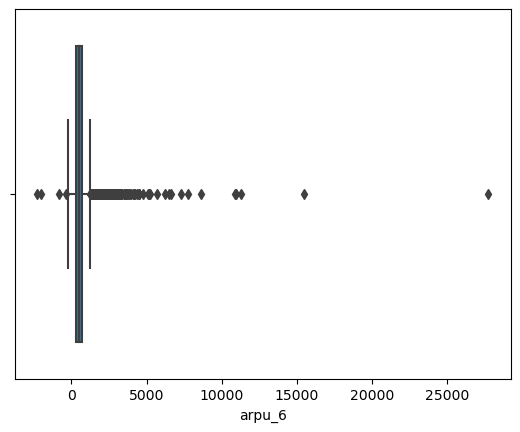

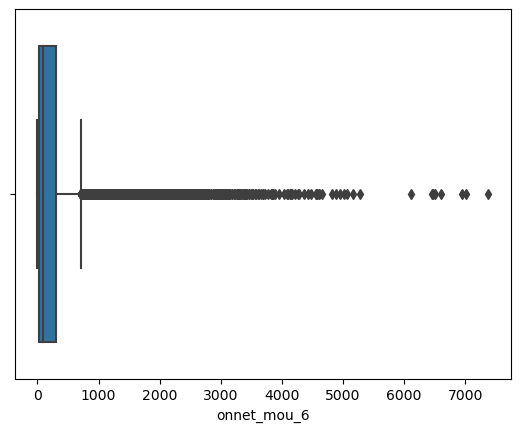

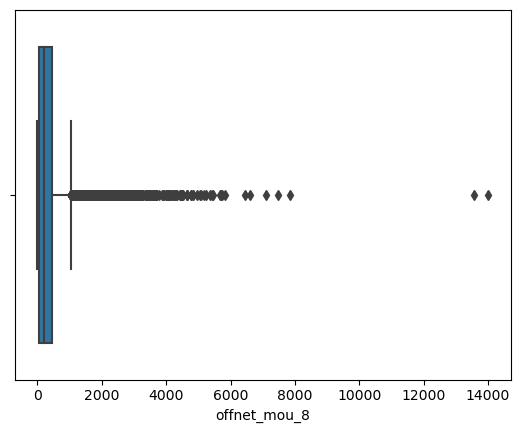

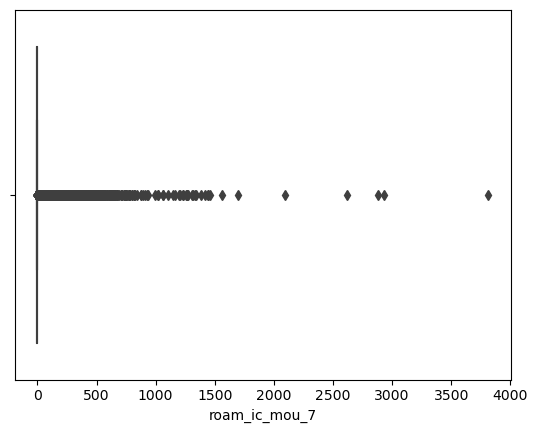

In [33]:
outlier_cols = ['arpu_6', 'onnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_7']

for col in outlier_cols:
    sns.boxplot(x=telecom_df[col])
    plt.show()


In [34]:
# getting numeric column
num_col = telecom_df.columns.tolist()
num_col.remove('churn')
len(num_col)

127

In [35]:
# as customer can have high mou (minutes of use) or high arpu(Average revenue per user)
# by imputing the threshold value can mislead the decision
# hence we will remove the outliers

# here we will incresase the IQR range by 15 percentile on both side to calculate lower and upper threashold value
# Q1 = 25-15 = 10 percentile
# Q3 = 75+15 = 90 percentile


for i in num_col: 
    Q1= telecom_df[i].quantile(0.10)
    Q3= telecom_df[i].quantile(0.90)
    IQR = Q3-Q1
    low_threshold = Q1-1.5*IQR
    upp_threshold = Q3+1.5*IQR
    
    # assigning the filterd data to telcom_df_1
    telecom_df_1= telecom_df.loc[(telecom_df[i] > low_threshold)  &   ( telecom_df[i]  <  upp_threshold) ]

telecom_df_1.shape


(27527, 128)

In [36]:
# Finding the Churn percentage
(telecom_df['churn'].value_counts()/len(telecom_df)) * 100

churn
0    94.400786
1     5.599214
Name: count, dtype: float64

The data in Churn column shows imbalance

In [37]:
# checking datatype
telecom_df_1.info(1)

<class 'pandas.core.frame.DataFrame'>
Index: 27527 entries, 7000701601 to 7002111859
Data columns (total 128 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       f

### Feature Engineering and EDA

#### Creating derived variable for Age on Network (aon)

In [38]:
# Age on network is in days hence converting into months considering a month having 30 days

telecom_df_1['aon'] = round(telecom_df_1['aon']/30,0)

# converting month into labels as 0-6 Mth, 6-12 Mth, 1-2 Yr , 2-5 Yr, 5 Yr and above
rnge = [0, 6, 12, 24, 60, 1000]
label = [ '0-6 Mth', '6-12 Mth', '1-2 Yr' , '2-5 Yr', '5 Yr and above']

telecom_df_1['aon_range'] = pd.cut(telecom_df_1['aon'], rnge, labels=label)
telecom_df_1[['aon', 'aon_range']].head(10)

,aon,aon_range
mobile_number,,
7000701601,27.0,2-5 Yr
7001524846,10.0,6-12 Mth
7002124215,24.0,1-2 Yr
7000887461,20.0,1-2 Yr
7000149764,44.0,2-5 Yr
7000815202,38.0,2-5 Yr
7000721289,67.0,5 Yr and above
7000294396,42.0,2-5 Yr
7002188521,23.0,1-2 Yr


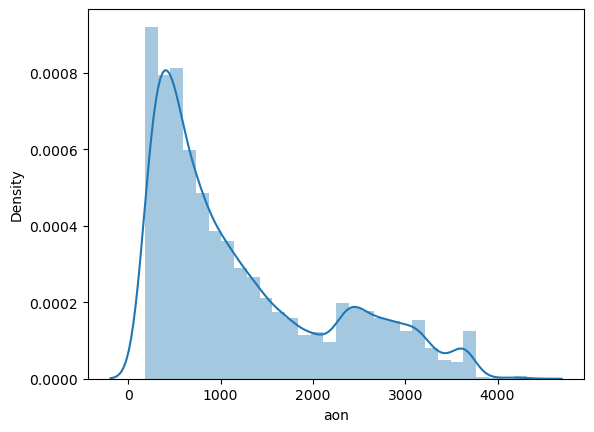

In [39]:
# Checking the distribution of the aon variable

sns.distplot(telecom_df['aon'],bins=30)
plt.show()

The distribution of Age on network shows data skewed to the right. This might show that as aon increases people tend to churn.

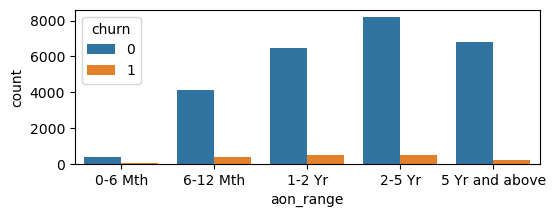

In [40]:
# Plotting a count plot for aon range
plt.figure(figsize=[6,2])
sns.countplot(x=telecom_df_1['aon_range'], hue=telecom_df_1['churn'])
plt.show()

It can be seen that the customers using service for more than 1 year tend to churn

#### Average Revenue Per User (arpu)

In [41]:
# deriving new column 'arpu_action' which is action column created by ( action phase - good phase)
# Average value in good phase = (month6 + month7)/2
# if value is negative we consider as 1 i.e  decreace value in action phase

telecom_df_1['arpu_action'] = telecom_df_1['arpu_8'] - ((telecom_df_1['arpu_6'] + telecom_df_1['arpu_7'])/2)
telecom_df_1['arpu_action'] = np.where(telecom_df_1['arpu_action']<0 , 1, 0)

In [42]:
# Creating churn dataframe
data_churn = telecom_df_1[telecom_df_1['churn'] == 1]
# Creating not churn dataframe
data_non_churn = telecom_df_1[telecom_df_1['churn'] == 0]

def graph(data1, data11, data2,data22 , data3, data33, data4):
    
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    ax = sns.distplot(data1,label='churn',hist=False)
    ax = sns.distplot(data11,label='not churn',hist=False)
   # ax.set(xlabel=data1)
    plt.legend()
    
    plt.subplot(3,1,2)
    ax = sns.distplot(data2,label='churn',hist=False)
    ax = sns.distplot(data22,label='not churn',hist=False)
    #ax.set(xlabel=data2)
    plt.legend()
    
    plt.subplot(3,1,3)
    ax = sns.distplot(data3,label='churn',hist=False)
    ax = sns.distplot(data33,label='not churn',hist=False)
    #ax.set(xlabel=data3)
    plt.legend()
    
    plt.figure(figsize=[6,2])
    sns.countplot(x=data4, hue=telecom_df_1['churn'])
    plt.show()
   

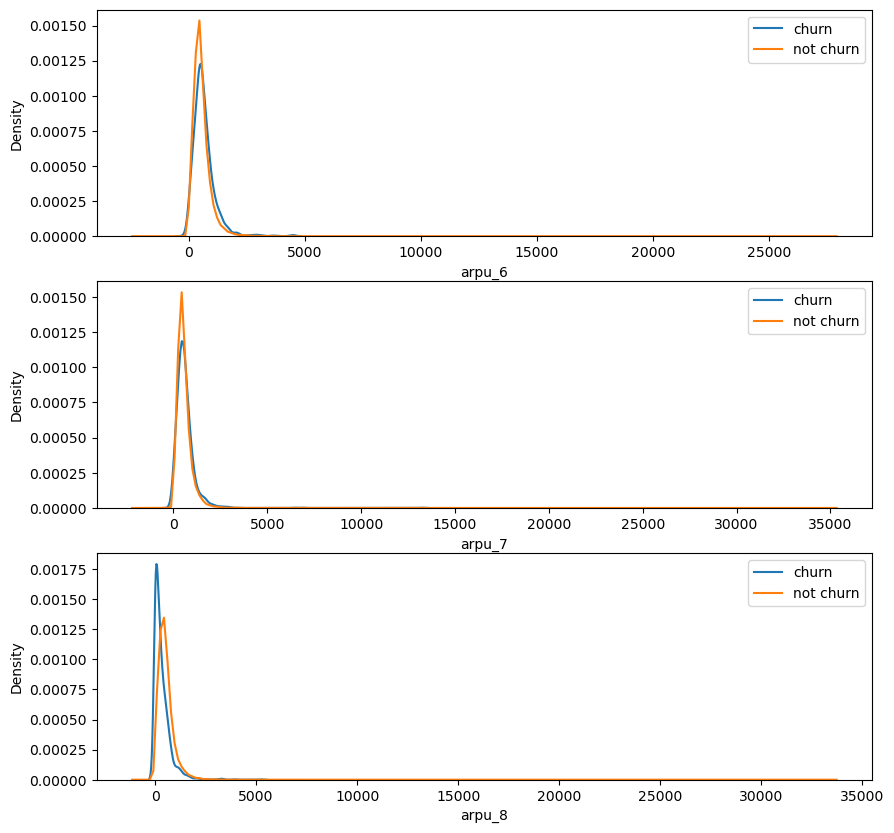

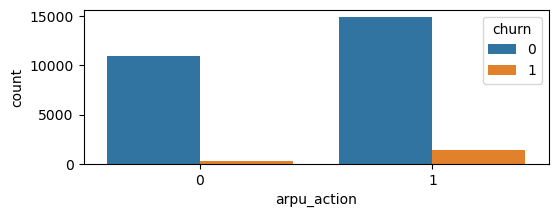

In [43]:
# Distribution plot of overall_rech_amt_8  (action phase) by using calling function
# Plotting a count plot for arpu_action range
graph(data_churn.arpu_6, data_non_churn.arpu_6,data_churn.arpu_7, data_non_churn.arpu_7,data_churn.arpu_8, data_non_churn.arpu_8, telecom_df_1.arpu_action)


if there is a decrease in Average revenue per user then it results in a more churn rate

#### total_og_mou

In [44]:
# deriving new column 'total_og_mou_action' which is action column created by ( action phase - good phase)
# good phase = (month6+month7)/2
# if value is negitive we consider as 1 i.e  decreace value in action phas

telecom_df_1['total_og_mou_action'] = telecom_df_1['total_og_mou_8'] -((telecom_df_1['total_og_mou_6']+telecom_df_1['total_og_mou_7'])/2)
telecom_df_1['total_og_mou_action'] = np.where(telecom_df_1['total_og_mou_action'] <0 , 1, 0)

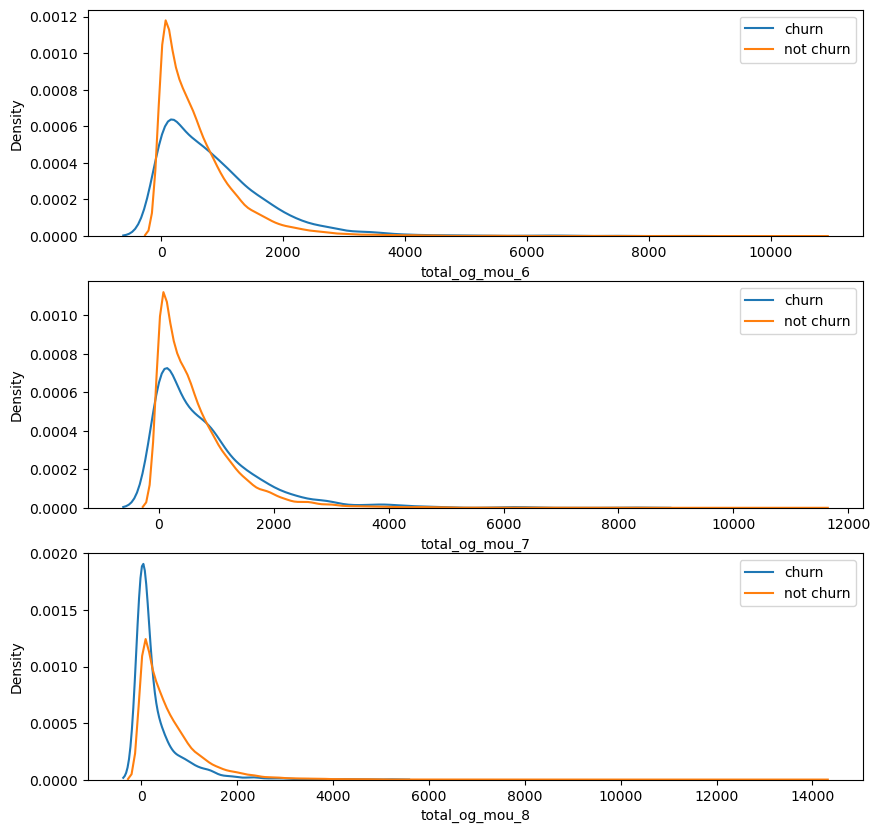

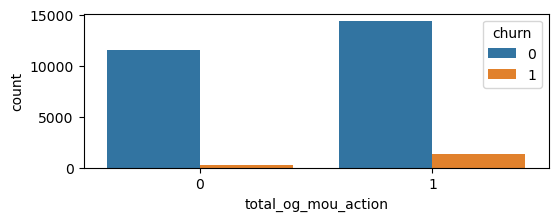

In [45]:
# Distribution plot of total_og_mou (action phase) by using calling function
# Plotting a count plot for total_og_mou_action 
graph(data_churn.total_og_mou_6, data_non_churn.total_og_mou_6,data_churn.total_og_mou_7, data_non_churn.total_og_mou_7,data_churn.total_og_mou_8, data_non_churn.total_og_mou_8, telecom_df_1.total_og_mou_action)


The decrease in total_og_mou_action phase has more churn rate

#### total_ic_mou_action 

In [46]:
# deriving new column 'total_ic_mou_action' which is action column created by ( action phase - good phase)
# good phase = (month6+month7)/2
# if value is negitive we consider as 1 i.e  decreace value in action phas

telecom_df_1['total_ic_mou_action'] = telecom_df_1['total_ic_mou_8'] -((telecom_df_1['total_ic_mou_6']+telecom_df_1['total_ic_mou_7'])/2)
telecom_df_1['total_ic_mou_action'] = np.where(telecom_df_1['total_ic_mou_action'] <0 , 1, 0)

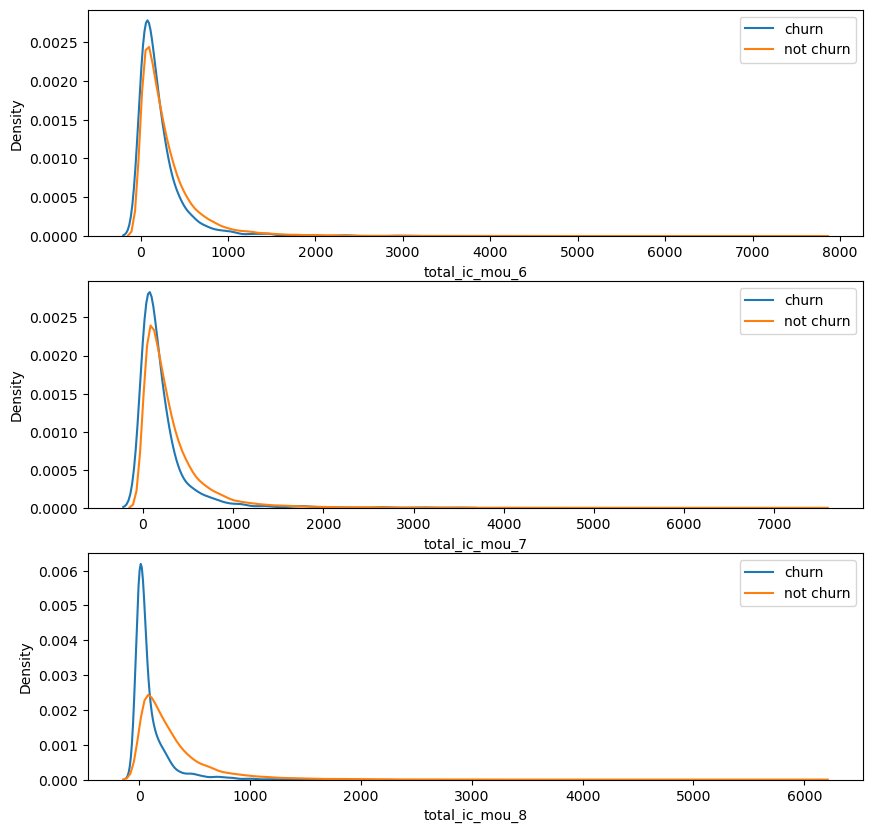

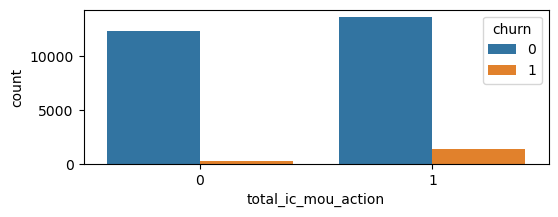

In [47]:
# Distribution plot of total_ic_mou  (action phase) by using calling function
# Plotting a count plot for total_ic_mou_action 
graph(data_churn.total_ic_mou_6, data_non_churn.total_ic_mou_6,data_churn.total_ic_mou_7, data_non_churn.total_ic_mou_7,data_churn.total_ic_mou_8, data_non_churn.total_ic_mou_8, telecom_df_1.total_ic_mou_action)


The decrease in total_ic_mou_action phase has more churn rate

#### vol_2g_mb

In [48]:
# deriving new column 'vol_2g_mb_action' which is action column created by ( action phase - good phase)
# good phase = (month6+month7)/2
# if value is negitive we consider as 1 i.e  decreace value in action phas

telecom_df_1['vol_2g_mb_action'] = telecom_df_1['vol_2g_mb_8'] -((telecom_df_1['vol_2g_mb_6']+telecom_df_1['vol_2g_mb_7'])/2)
telecom_df_1['vol_2g_mb_action'] = np.where(telecom_df_1['vol_2g_mb_action'] <0 , 1, 0)

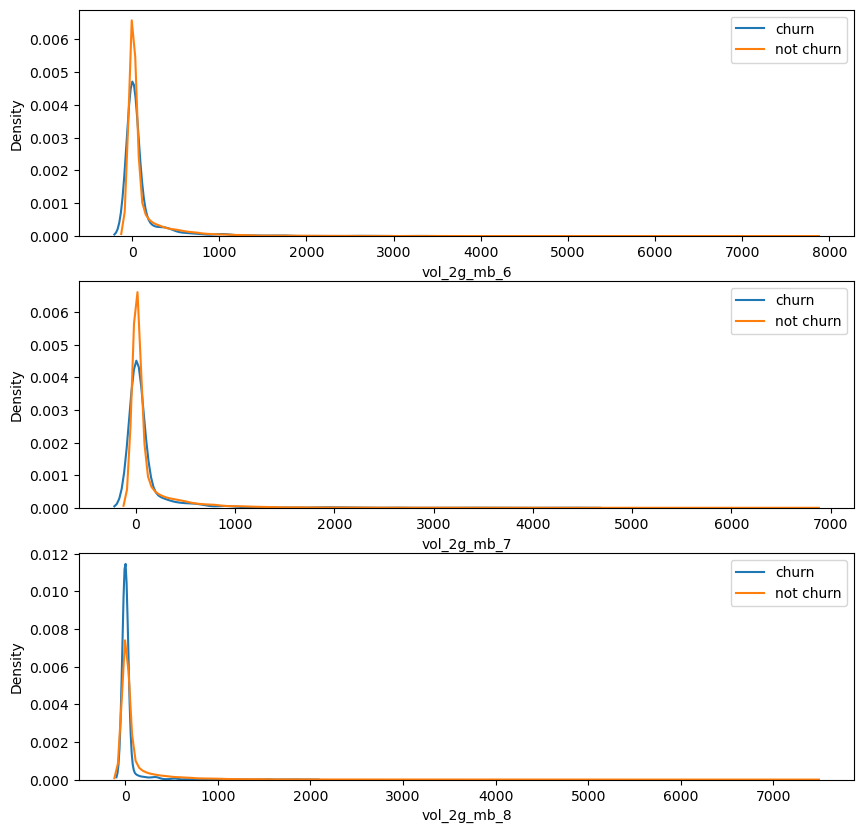

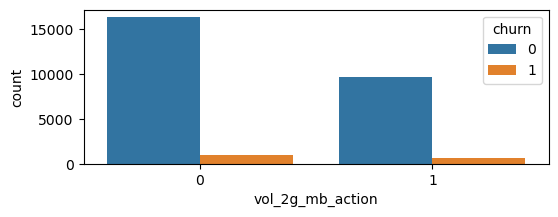

In [49]:
# Distribution plot of vol_2g_mb  (action phase) by using calling function
# Plotting a count plot for vol_2g_mb_action  
graph(data_churn.vol_2g_mb_6, data_non_churn.vol_2g_mb_6,data_churn.vol_2g_mb_7, data_non_churn.vol_2g_mb_7,data_churn.vol_2g_mb_8, data_non_churn.vol_2g_mb_8, telecom_df_1.vol_2g_mb_action)


#### vol_3g_mb

In [50]:
# deriving new column 'vol_3g_mb_action' which is action column created by ( action phase - good phase)
# good phase = (month6+month7)/2
# if value is negitive we consider as 1 i.e  decreace value in action phas

telecom_df_1['vol_3g_mb_action'] = telecom_df_1['vol_3g_mb_8'] -((telecom_df_1['vol_3g_mb_6']+telecom_df_1['vol_3g_mb_7'])/2)
telecom_df_1['vol_3g_mb_action'] = np.where(telecom_df_1['vol_3g_mb_action'] <0 , 1, 0)

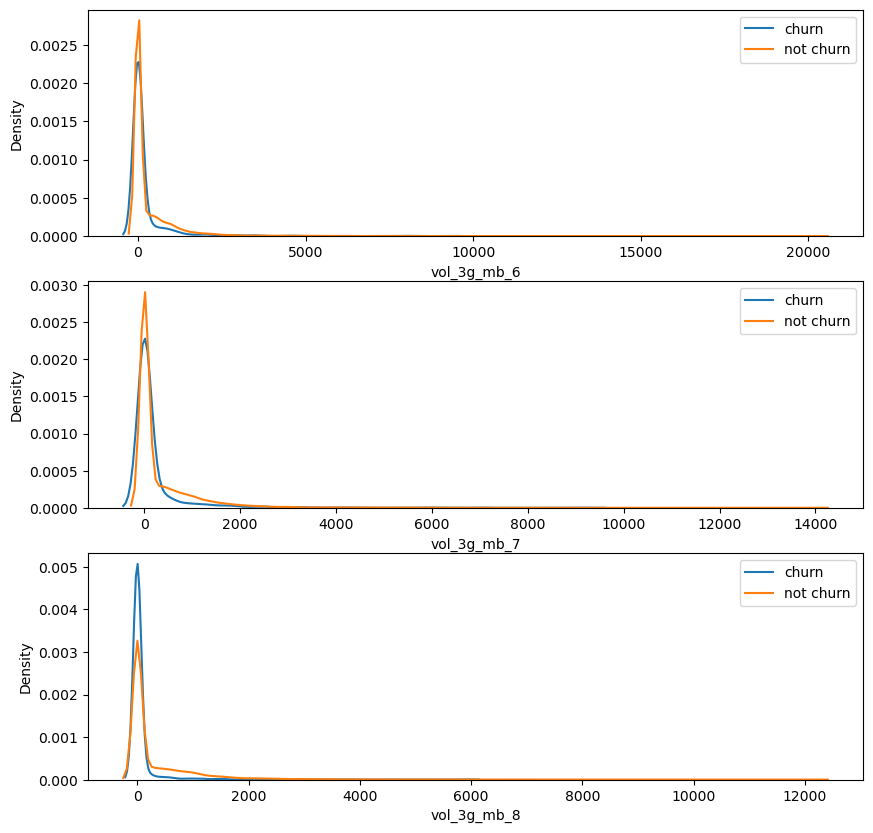

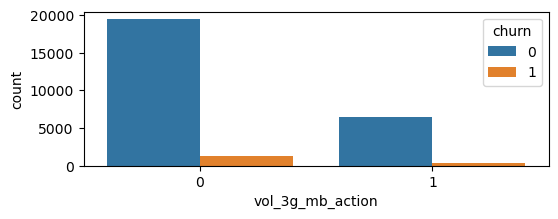

In [51]:
# Distribution plot of vol_3g_mb  (action phase) by using calling function
# Plotting a count plot for vol_3g_mb_action
graph(data_churn.vol_3g_mb_6, data_non_churn.vol_3g_mb_6,data_churn.vol_3g_mb_7, data_non_churn.vol_3g_mb_7,data_churn.vol_3g_mb_8, data_non_churn.vol_3g_mb_8, telecom_df_1.vol_3g_mb_action)


#### vbc_3g

'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'

In [52]:
# deriving new column which 'vbc_3g_action_action' is action column created by ( action phase - good phase)
# good phase = (month6+month7)/2
# if value is negitive we consider as 1 i.e  decreace value in action phas

telecom_df_1['vbc_3g_action_action'] = telecom_df_1['aug_vbc_3g'] -((telecom_df_1['jun_vbc_3g']+telecom_df_1['jul_vbc_3g'])/2)
telecom_df_1['vbc_3g_action_action'] = np.where(telecom_df_1['vbc_3g_action_action'] <0 , 1, 0)

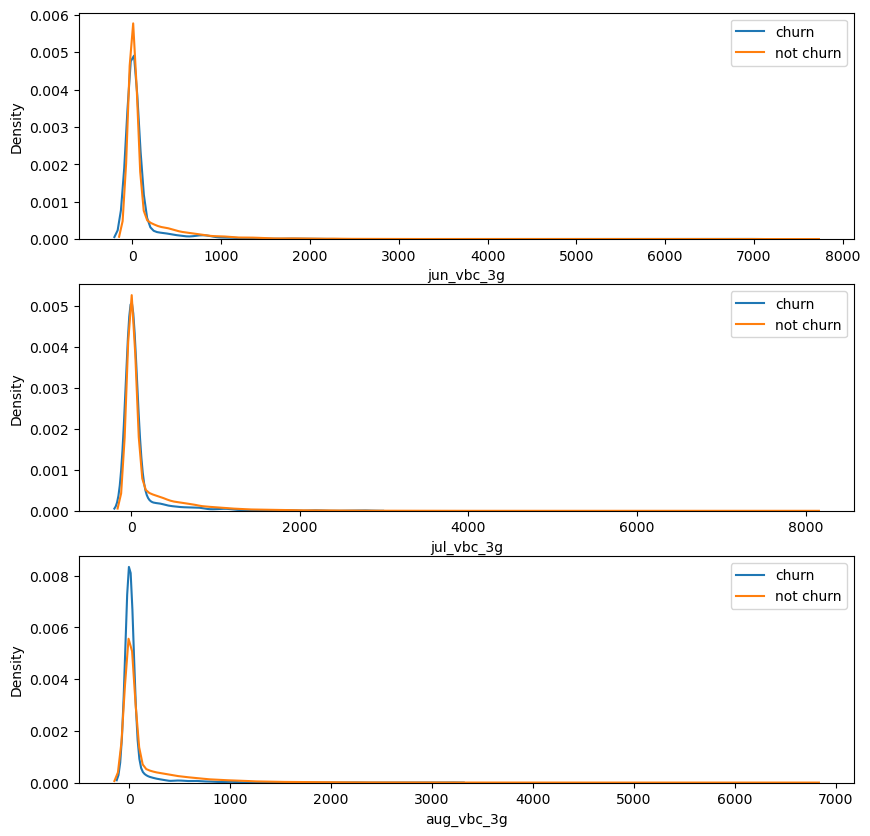

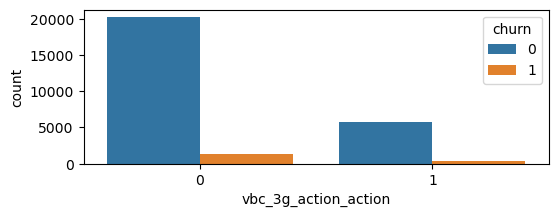

In [53]:
# Distribution plot of vbc_3g_action  (action phase) by using calling function
# Plotting a count plot for vbc_3g_action_action 
graph(data_churn.jun_vbc_3g, data_non_churn.jun_vbc_3g,data_churn.jul_vbc_3g, data_non_churn.jul_vbc_3g,data_churn.aug_vbc_3g, data_non_churn.aug_vbc_3g, telecom_df_1.vbc_3g_action_action)


#### total_rech_num

In [54]:
# deriving new column 'total_rech_num_action' which is action column created by ( action phase - good phase)
# good phase = (jun+july)/2
# if value is negitive we consider as 1 i.e  decreace value in action phae
telecom_df_1['total_rech_num_action'] = telecom_df_1['total_rech_num_8'] -((telecom_df_1['total_rech_num_6']+telecom_df_1['total_rech_num_7'])/2)
telecom_df_1['total_rech_num_action'] = np.where(telecom_df_1['total_rech_num_action']<0, 1, 0)

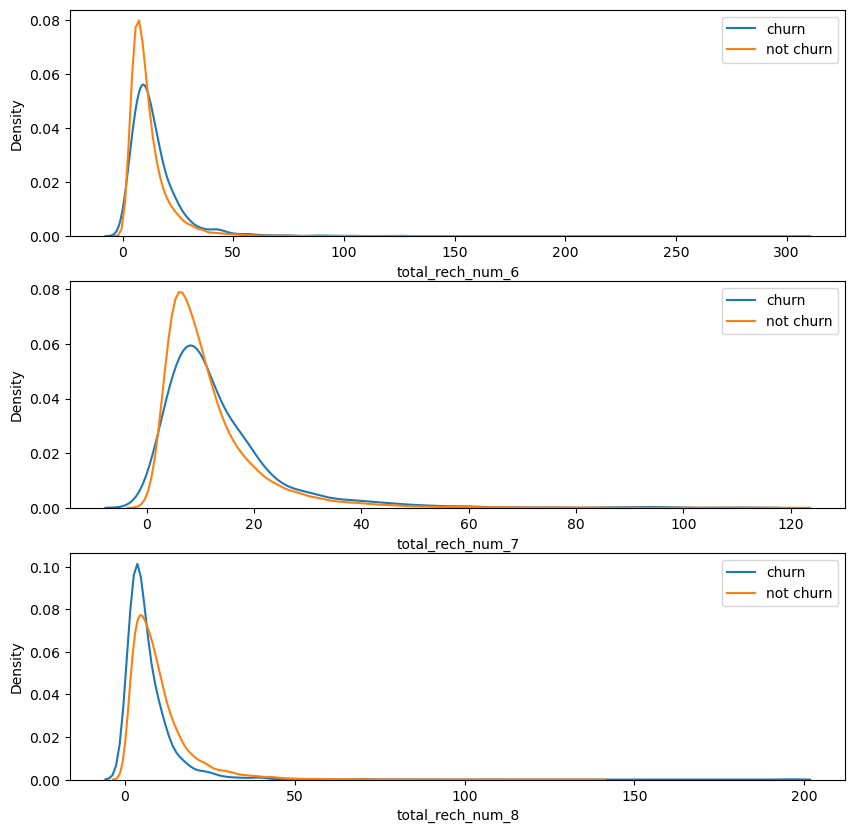

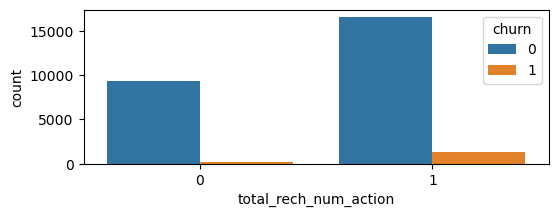

In [55]:
# Distribution plot of total_rech_num  (action phase) by using calling function
# Plotting a count plot for total_rech_num_action  
graph(data_churn.total_rech_num_6, data_non_churn.total_rech_num_6,data_churn.total_rech_num_7, data_non_churn.total_rech_num_7,data_churn.total_rech_num_8, data_non_churn.total_rech_num_8, telecom_df_1.total_rech_num_action)


####   total_rech_amt_data

In [56]:
# deriving new column 'total_rech_amt_data_action' which is action column created by ( action phase - good phase)
# good phase = (jun+july)/2
# if value is negitive we consider as 1 i.e  decreace value in action phae
telecom_df_1['total_rech_amt_data_action'] = telecom_df_1['total_rech_amt_data_8'] -((telecom_df_1['total_rech_amt_data_6']+telecom_df_1['total_rech_amt_data_7'])/2)
telecom_df_1['total_rech_amt_data_action'] = np.where(telecom_df_1['total_rech_amt_data_action']<0, 1, 0)

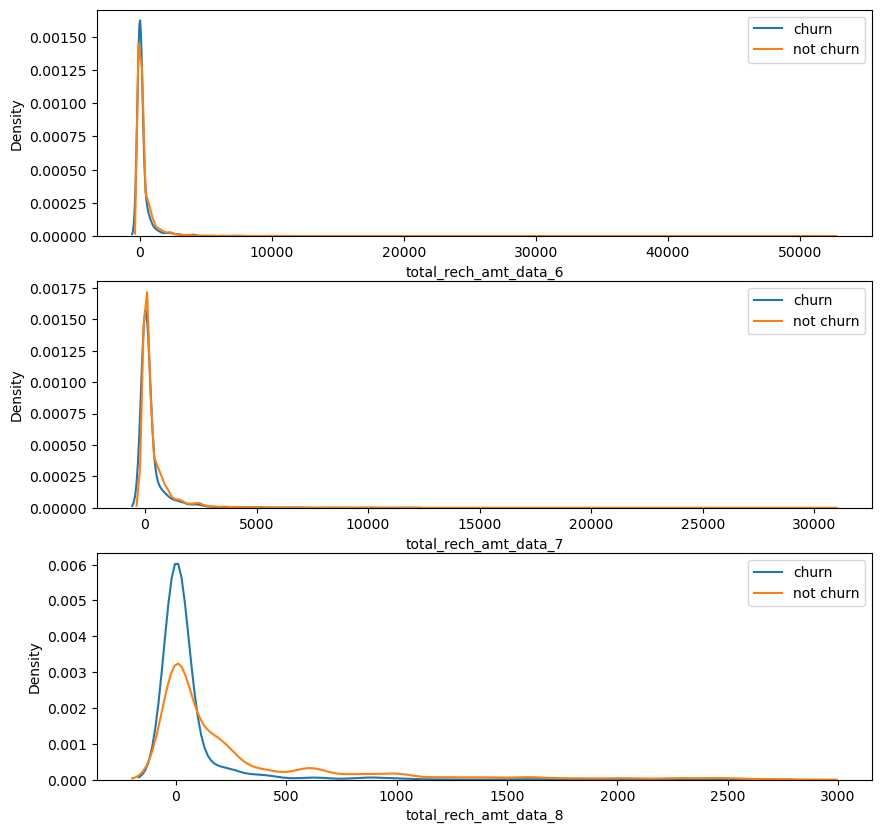

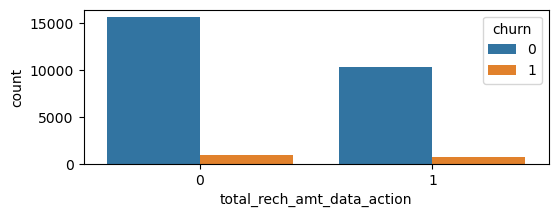

In [57]:
# Distribution plot of total_rech_amt_data  (action phase) by using calling function
# Plotting a count plot for total_rech_amt_data_action  
graph(data_churn.total_rech_amt_data_6, data_non_churn.total_rech_amt_data_6,data_churn.total_rech_amt_data_7, data_non_churn.total_rech_amt_data_7,data_churn.total_rech_amt_data_8, data_non_churn.total_rech_amt_data_8, telecom_df_1.total_rech_amt_data_action)


#### total_rech_amt

In [58]:
# deriving new column 'total_rech_amt_action' which is action column created by ( action phase - good phase)
# good phase = (jun+july)/2
# if value is negitive we consider as 1 i.e  decreace value in action phae
telecom_df_1['total_rech_amt_action'] = telecom_df_1['total_rech_amt_8'] -((telecom_df_1['total_rech_amt_6']+telecom_df_1['total_rech_amt_7'])/2)
telecom_df_1['total_rech_amt_action'] = np.where(telecom_df_1['total_rech_amt_action']<0, 1, 0)

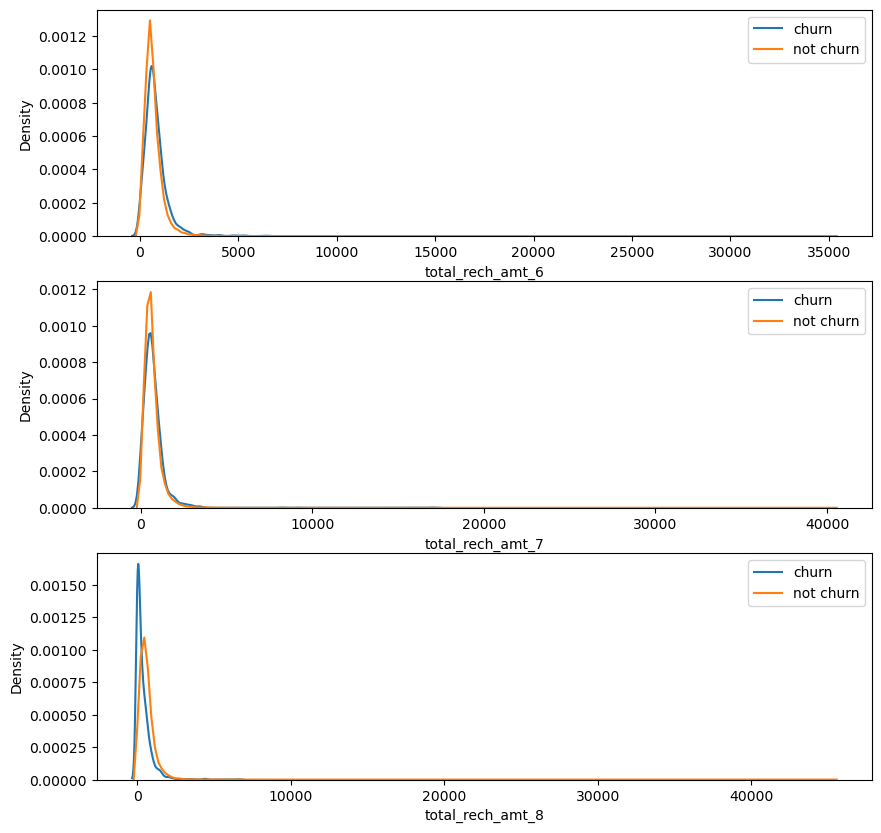

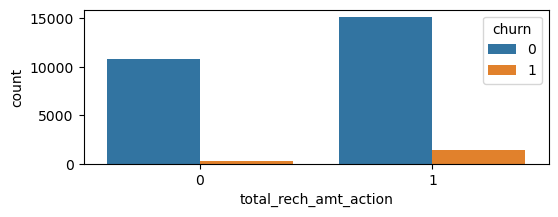

In [59]:
# Distribution plot of total_rech_amt  (action phase) by using calling function
# Plotting a count plot for total_rech_num_action    
graph(data_churn.total_rech_amt_6, data_non_churn.total_rech_amt_6,data_churn.total_rech_amt_7, data_non_churn.total_rech_amt_7,data_churn.total_rech_amt_8, data_non_churn.total_rech_amt_8, telecom_df_1.total_rech_amt_action)


In [60]:
print('\nThe dimension of the updated dataset is', telecom_df_1.shape)


The dimension of the updated dataset is (27527, 138)


In [61]:
telecom_df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn,aon_range,arpu_action,total_og_mou_action,total_ic_mou_action,vol_2g_mb_action,vol_3g_mb_action,vbc_3g_action_action,total_rech_num_action,total_rech_amt_data_action,total_rech_amt_action
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,27.0,57.74,19.38,18.74,0.0,0.0,0.0,1,2-5 Yr,0,1,1,0,0,0,0,0,0
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,10.0,21.03,910.65,122.16,0.0,354.0,207.0,0,6-12 Mth,1,1,1,1,1,1,1,0,1
7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.

### Train-Test Split

In [62]:
y = telecom_df_1['churn']
X = telecom_df_1.drop(['churn','aon_range'], axis=1)  #Removing aon_range as it is categorical column

print(X.shape, y.shape)

(27527, 136) (27527,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [64]:
X_train.shape,y_train.shape, X_test.shape,  y_test.shape

((19268, 136), (19268,), (8259, 136), (8259,))

### Handing Class Imbalance

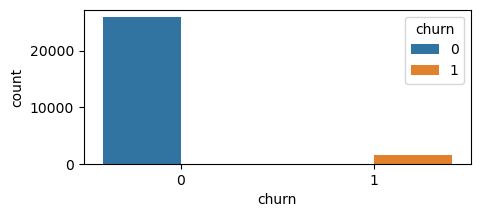

In [65]:
# Visualizing the CHURN column values
plt.figure(figsize=(5,2))
sns.countplot(x=telecom_df_1['churn'], hue=telecom_df_1['churn']) 
plt.show()

We see a heavy imbalance here in the CHURN column values. To account for class imbalance, Synthetic Minority Class Oversampling Technique (SMOTE) could be used

In [66]:
# handling data imbalance using SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

In [67]:
# Resampling Train set to account for class imbalance

X_train_smt, y_train_smt= smt.fit_resample(X_train, y_train)
y_train_smt.value_counts()

churn
0    18152
1    18152
Name: count, dtype: int64

In [68]:
#checking the sahpe of smot train data
print ('The updated dimensions after handling class imbalance is', X_train_smt.shape, y_train_smt.shape)

The updated dimensions after handling class imbalance is (36304, 136) (36304,)


### Model building using Random Forest

### Hyper Parameter tuning

In [69]:
%%time
param_grid = {
    'max_depth': [3,5,7],
    'min_samples_leaf': [20, 35, 50],
    'n_estimators': [100,200,300], 
    'max_features': [10, 15]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: total: 2min 17s
Wall time: 1h 7min 25s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [10, 15],
                         'min_samples_leaf': [20, 35, 50],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [70]:
# getting best accuracy for the model
grid_search.best_score_

0.9048042332950135

In [71]:
# getting best hyperparameter for the model
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, max_features=15, min_samples_leaf=20,
                       n_estimators=300)

In [72]:
# printing the optimal accuracy score and hyperparameters

print('We can get best accuracy of', round(grid_search.best_score_, 4)*100,'% using following params:\n\n', grid_search.best_params_)

We can get best accuracy of 90.48 % using following params:

 {'max_depth': 7, 'max_features': 15, 'min_samples_leaf': 20, 'n_estimators': 300}


In [73]:
# selecting the best model using best_estimator_
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, max_features=15, min_samples_leaf=20,
                       n_estimators=300)

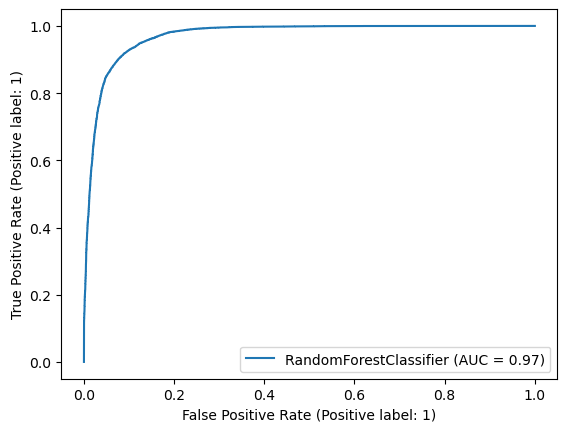

In [74]:
# viewing ROC curve for SMOTE train data
RocCurveDisplay.from_estimator(rf_best, X_train_smt, y_train_smt)
plt.show()

The ROC curve shows a healthy 97% AUC

### Predictions on the train set

In [75]:
# predict y_train 
y_train_pred = rf_best.predict(X_train_smt)

In [76]:
# Confusion matrix for train set
confusion = metrics.confusion_matrix(y_train_smt, y_train_pred)
print(confusion)

[[16578  1574]
 [ 1558 16594]]


In [77]:
# Calculating Accuracy, Sensitivity recall, precision, Specificity for train data

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

train_Accuracy = round(metrics.accuracy_score(y_train_smt, y_train_pred)*100, 2)
train_Sensitivity = round((TP / float(TP+FN)*100), 2)
train_Specificity = round((TN / float(TN+FP)*100), 2)


# Accuracy
print("Accuracy of train data    : ", train_Accuracy, '%')

# Sensitivity
print("Sensitivity of train data : ", train_Sensitivity, '%')

# Specificity
print("Specificity of train data : ", train_Specificity, '%')



Accuracy of train data    :  91.37 %
Sensitivity of train data :  91.42 %
Specificity of train data :  91.33 %


### Predictions on Test set

In [78]:
# predict y_test
y_test_pred = rf_best.predict(X_test)

In [79]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7024  763]
 [ 156  316]]


In [80]:
# Calculating Accuracy, Sensitivity recall, precision, Specificity for test data

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

test_Accuracy = round(metrics.accuracy_score(y_test, y_test_pred)*100, 2)
test_Sensitivity = round((TP / float(TP+FN)*100), 2)
test_Specificity = round((TN / float(TN+FP)*100), 2)


# Accuracy
print("Accuracy of test data    : ", test_Accuracy, '%')

# Sensitivity
print("Sensitivity of test data : ", test_Sensitivity, '%')

# Specificity
print("Specificity of test data : ", test_Specificity, '%')

Accuracy of test data    :  88.87 %
Sensitivity of test data :  66.95 %
Specificity of test data :  90.2 %


In [81]:
# visualisation of the score
score = pd.DataFrame({'Score of train data in %': [train_Accuracy, train_Sensitivity ,train_Specificity],
                     'Score of test data in %': [test_Accuracy, test_Sensitivity, test_Specificity],
                     '' : ['Accuracy','Sensitivity','Specificity'] })
score.set_index('')

,Score of train data in %,Score of test data in %
,,
Accuracy,91.37,88.87
Sensitivity,91.42,66.95
Specificity,91.33,90.20


 ### Feature Importance

In [82]:
Feature_importance = pd.DataFrame({
    'var_name': X_train.columns,
    'Importance': rf_best.feature_importances_
})

Feature_importance.sort_values(by='Importance', ascending=False).head(10)

,var_name,Importance
14,roam_og_mou_8,0.170950
11,roam_ic_mou_8,0.139397
80,total_ic_mou_8,0.064037
65,loc_ic_mou_8,0.049256
59,loc_ic_t2m_mou_8,0.040771
101,last_day_rch_amt_8,0.038835
95,total_rech_amt_8,0.037238
126,total_rech_amt_data_8,0.035361
29,loc_og_mou_8,0.031664
20,loc_og_t2m_mou_8,0.028691


# Inference:
1. The feature importance shows that in the action phase, the roaming incoming and outgoing minutes of usage are very important factors that the telecom company should be aware of.
2. Some attractive roaming plans can help lure customers in staying with the company for longer duration.
3. Along with roaming, local and total incoming minutes are also important to be tracked by the company.
4. Recharge amount is another important factor and some attractive recharge offers can help reduce the churn.

#### Specificity is the proportion of True Negatives which is 90.20%, hence model is predicting that the 90.20% of the customer will not churn.
#### Hence we will eliminate these 90.20% customer and concentrate on 9.80% customer who are likely to churn.
